In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [78]:
df=pd.read_csv("advertising SLR(in).csv")

In [79]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [80]:
df.shape

(200, 4)

In [81]:
df.size

800

In [82]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [83]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [84]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [85]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

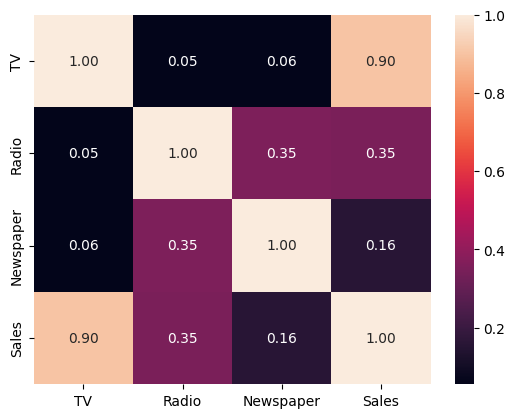

In [86]:
sns.heatmap(data=df.corr(), annot=True,fmt='0.2f' )

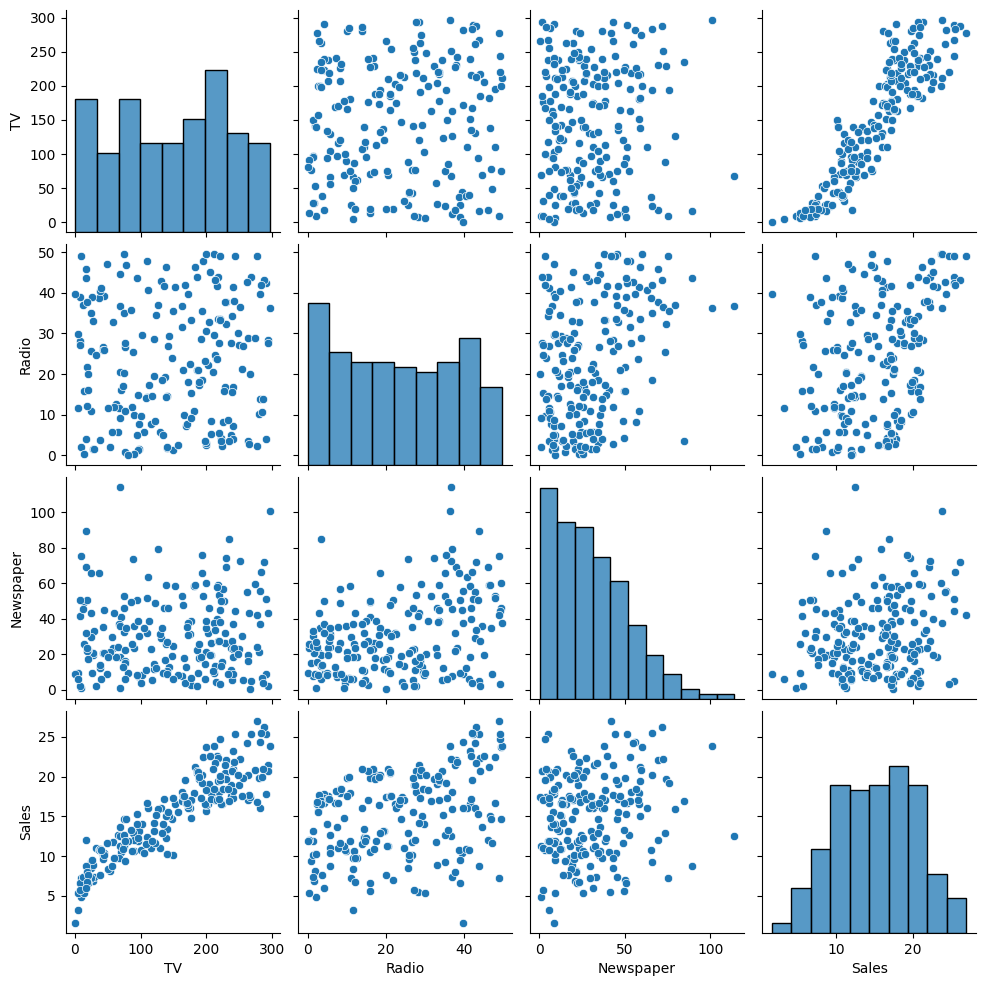

In [87]:
sns.pairplot(df)

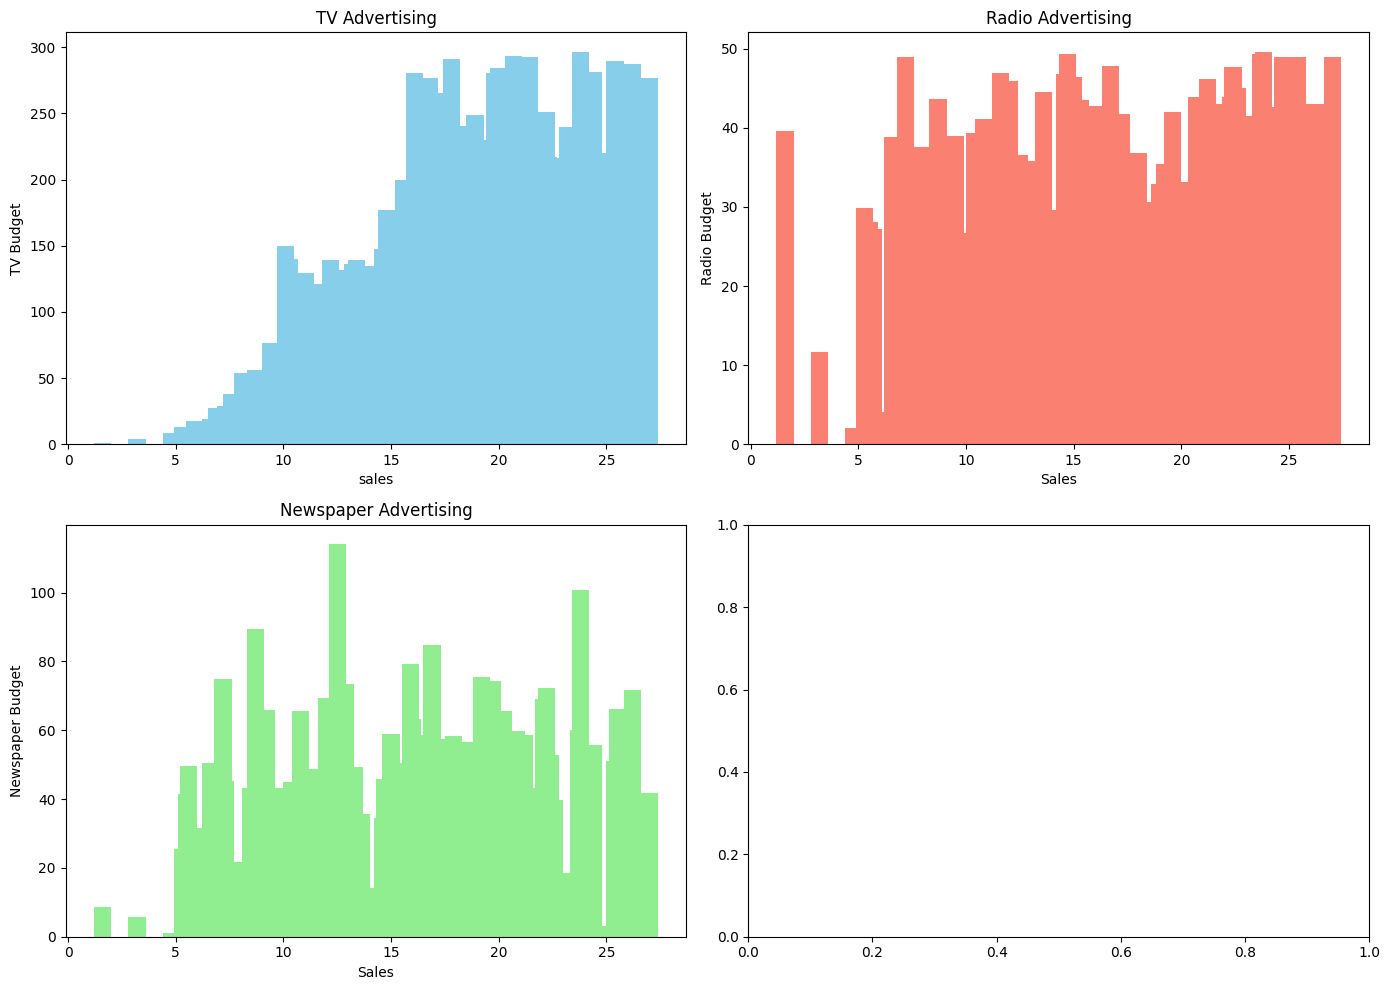

In [107]:

# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Bar plot for TV
axs[0, 0].bar(df['Sales'], df['TV'], color='skyblue')
axs[0, 0].set_title('TV Advertising')
axs[0, 0].set_xlabel('sales')
axs[0, 0].set_ylabel('TV Budget')

# Bar plot for Radio
axs[0, 1].bar(df['Sales'], df['Radio'], color='salmon')
axs[0, 1].set_title('Radio Advertising')
axs[0, 1].set_xlabel('Sales')
axs[0, 1].set_ylabel('Radio Budget')

# Bar plot for Newspaper
axs[1, 0].bar(df['Sales'], df['Newspaper'], color='lightgreen')
axs[1, 0].set_title('Newspaper Advertising')
axs[1, 0].set_xlabel('Sales')
axs[1, 0].set_ylabel('Newspaper Budget')



plt.tight_layout()
plt.show()

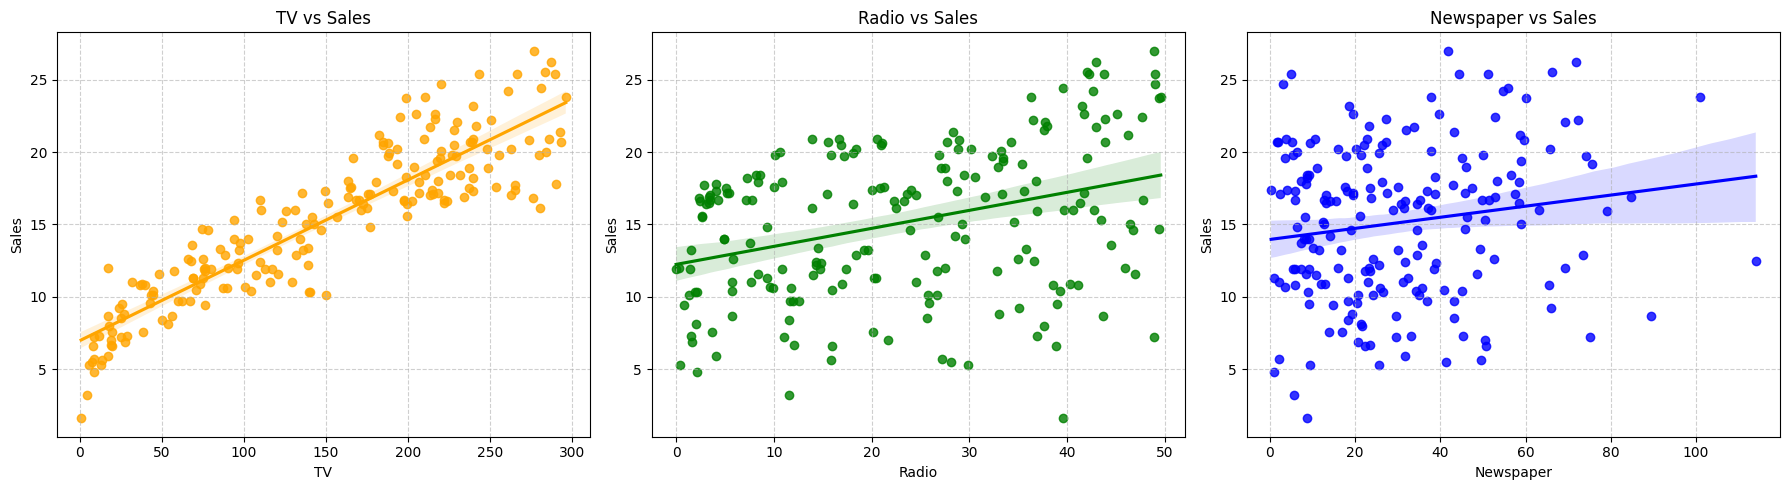

In [89]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x='TV', y='Sales', data=df, ax=axs[0], color='orange')
axs[0].set_title('TV vs Sales')

sns.regplot(x='Radio', y='Sales', data=df, ax=axs[1], color='green')
axs[1].set_title('Radio vs Sales')

sns.regplot(x='Newspaper', y='Sales', data=df, ax=axs[2], color='blue')
axs[2].set_title('Newspaper vs Sales')

for ax in axs:
    ax.grid(True, ls='--', alpha=0.6)

plt.tight_layout()
plt.show()




#determining x and y Values

In [90]:
x=df.iloc[:,0]
print(x.head())
y=df.iloc[:,-1]
print(y.head())

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


#Train and test split

In [92]:
# train test split
from sklearn.model_selection import train_test_split

# Add constant intercept term
x = sm.add_constant(x)  # adds intercept term

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)




In [93]:

# Fit model on training data
model = sm.OLS(ytrain, xtrain).fit()

# Print full regression summary (includes coef, std err, t, p-values)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.0
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.73e-59
Time:                        15:28:39   Log-Likelihood:                -353.74
No. Observations:                 160   AIC:                             711.5
Df Residuals:                     158   BIC:                             717.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1623      0.358     19.997      0.0

In [94]:
print(xtrain.shape)

(160, 2)


In [95]:
print(xtest.shape)

(40, 2)


#Model Building

In [96]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression()

In [50]:
linreg.fit(xtrain,ytrain)

LinearRegression()

#Model Predictions


In [98]:
ypred=linreg.predict(xtest)
print(ypred)

[10.92912965  9.88399105 12.08313684 22.93189318 16.42699412 10.22148373
  7.63585439 20.23195181  8.45781235 17.91849399 21.38595901 11.90894708
 15.68668762 17.38503783 11.32105662 13.70527904 21.62002651  7.20037998
 11.22851831 18.77855596 22.81758114 14.7994085  16.6937222  14.33127351
 10.07451111 13.86313851 16.17659633 18.32130782 19.35555956  8.52857694
 10.85292163 17.98925858 22.44198446 20.3190467   7.88080875  8.18019741
 10.40656035 17.00399772 10.88558221  8.52313351]


In [99]:
ytest

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7
182,8.7
5,7.2
146,18.2
12,9.2
152,16.6


In [100]:
residualerror=ytest-ypred
residualerror

,Sales
18,0.370870
170,-1.483991
107,-0.083137
98,2.468107
177,0.273006
182,-1.521484
5,-0.435854
146,-2.031952
12,0.742188
152,-1.318494


#Checking Linearity
How to check:
Plot Residuals vs Fitted values.

Residuals should be randomly scattered around zero (no clear pattern).

What to look for:
No curved or systematic pattern. If residuals fan out or curve, linearity may be violated.

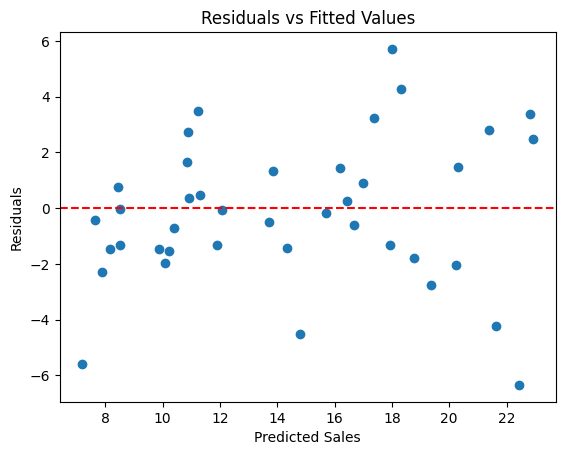

In [101]:


plt.scatter(ypred, residualerror)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#2. Independence of Errors
How to check:
Plot residuals in the order of data collection.

Use Durbin-Watson test to detect autocorrelation.

What is considered a good DW result?
Ideally, DW ≈ 2 means residuals are independent (no autocorrelation).

Values between 1.5 and 2.5 are often considered acceptable.

Values far below 1.5 or above 2.5 indicate potential autocorrelation problems.



Why does it matter?
Autocorrelation violates OLS regression assumptions.

It makes standard errors unreliable.

Can affect hypothesis tests and confidence intervals.

What to do if DW shows autocorrelation?
Consider adding lag variables.

Use time-series regression models like ARIMA.

Use robust standard errors.

Check for omitted variables or model misspecification.



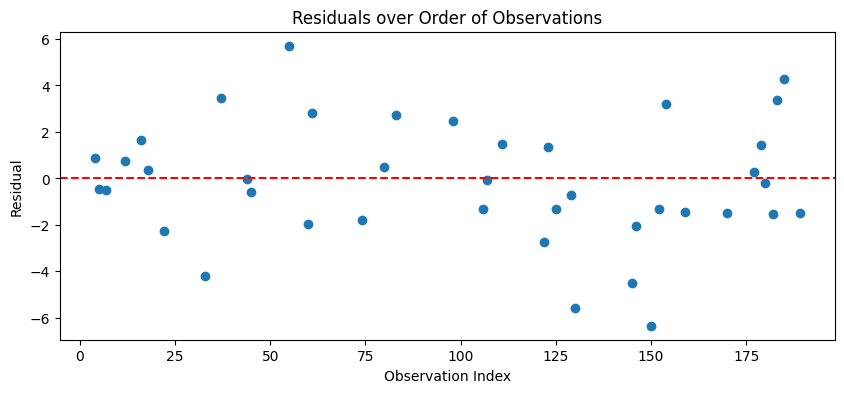

In [104]:
# Residuals plot over observation order
plt.figure(figsize=(10, 4))
plt.plot(residualerror, marker='o', linestyle='')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals over Order of Observations')
plt.xlabel('Observation Index')
plt.ylabel('Residual')
plt.show()

In [105]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residualerror)

# Check if it's an array
if isinstance(dw_stat, (list, np.ndarray)):
    dw_stat = dw_stat[0]  # Take first value

print(f'Durbin-Watson statistic: {dw_stat:.3f}')

Durbin-Watson statistic: 2.489


#Evaluation Metrics

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

print("R2:", r2_score(ytest,ypred))
print("MAE:", mean_absolute_error(ytest,ypred))
print("MSE:", mean_squared_error(ytest,ypred))
print("RMSE:", np.sqrt(mean_squared_error(ytest,ypred)))

R2: 0.7104538872256765
MAE: 2.01486731475948
MSE: 6.639091226559302
RMSE: 2.576643403065178


ValueError: x and y must be the same size

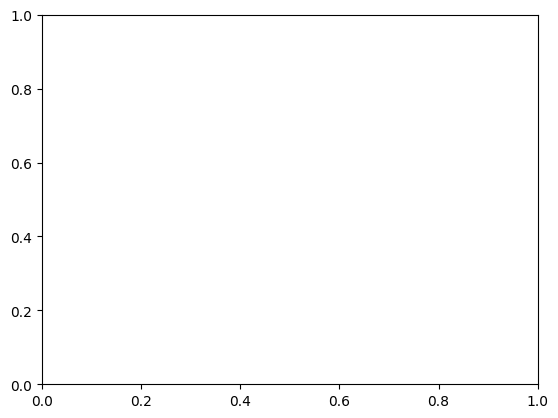

In [109]:
plt.scatter(xtest, ytest, color='blue')
plt.plot(xtest, ypred, color='red')
plt.title('TV sales Chart')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

#3. Homoscedasticity
The variance of residuals is constant across all levels of predicted values.
How to check:
Residuals vs fitted values plot (same as linearity plot).

Look for “fanning” (residual spread increasing or decreasing).

Code:
Same plot as linearity check (Residuals vs Fitted).
If residuals form a funnel shape → heteroscedasticity → needs fixing.

#4. Normality of Residuals
Residuals should be approximately normally distributed.

How to check:
Histogram of residuals

Q-Q plot (quantile-quantile plot)



1. Histogram of Residuals
Ideal shape: Approximately bell-shaped (normal distribution) centered roughly around zero.

The distribution may not be perfectly symmetric but should not be highly skewed or have heavy tails.

Presence of multiple peaks, strong skewness, or outliers suggests non-normality.

Interpretation:
A bell-shaped histogram supports the assumption that residuals are normally distributed.

2. Q-Q Plot (Quantile-Quantile Plot)
Ideal plot: The points should fall approximately along the 45-degree diagonal line.

Minor deviations are normal, but large systematic deviations (especially at the tails) indicate residuals deviate from normality.

Curves or S-shaped patterns imply skewness or kurtosis issues.

Interpretation:
If points lie close to the line, residuals are approximately normal. Large deviations suggest violation of normality.

Why Does Normality Matter?
Normality of residuals is important for:

Validity of hypothesis tests (t-tests on coefficients, F-tests).

Reliable confidence intervals and p-values.

The regression coefficients remain unbiased even if residuals are non-normal, but inference becomes less reliable.


If your plots suggest non-normality, you might consider:

Applying transformations to your target variable (e.g., log, sqrt).

Using robust regression methods.

Checking for outliers or influential points.



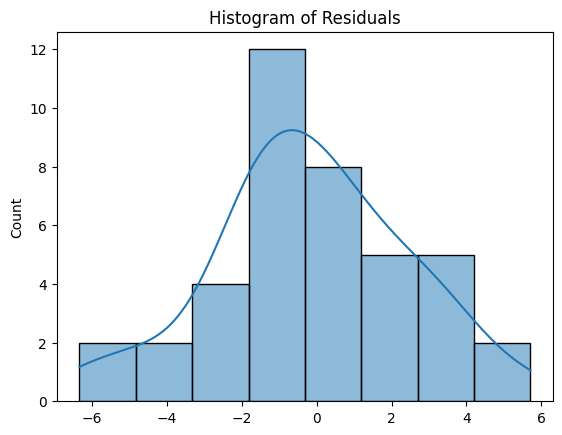

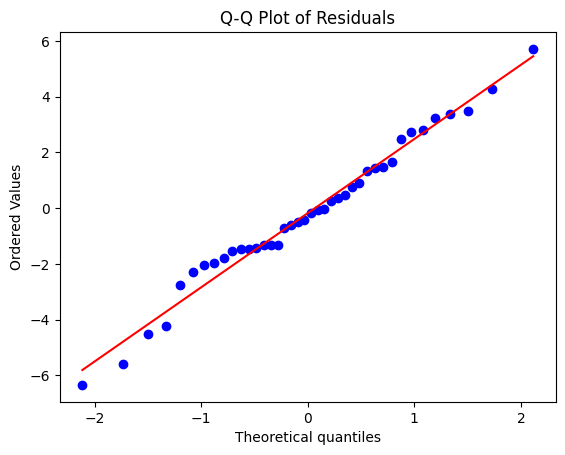

In [106]:
import scipy.stats as stats


# Flatten residuals to 1D
residuals_1d = np.ravel(residualerror)  # or residualerror.flatten()

# Histogram
sns.histplot(residuals_1d, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
stats.probplot(residuals_1d, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()